In [2]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

# Projeto 2 - Sinais e Sistemas em Tempo Discreto - 2025/02
# Identificação
## Nome: Hércules Natan Dantas de Almeida Medeiros
## Matrícula: 222009760

# Funções utilizadas.

Coloque abaixo as funções desenvolvidas para este projeto.

In [25]:
#Código das funções utilizadas.
def plot_pz(z, p):
    fig, ax = plt.subplots(figsize=(6,6))

    theta = np.linspace(0, 2*np.pi, 400)
    ax.plot(np.cos(theta), np.sin(theta), linestyle='--', color='gray', linewidth=1)

    ax.axhline(0, color='k', linewidth=0.5)
    ax.axvline(0, color='k', linewidth=0.5)

    if z.size > 0:
        ax.plot(z.real, z.imag, 'o', markersize=10, label='Zeros')
    if p.size > 0:
        ax.plot(p.real, p.imag, 'x', markersize=12, label='Polos')
    ax.set_title('Diagrama de Polos (x) e Zeros (o) - Filtro LP')
    ax.set_xlabel('Real')
    ax.set_ylabel('Imaginário')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_aspect('equal', 'box')
    ax.grid(True)
    ax.legend()
    plt.show()

def poly_to_zinv_str(coeffs):
    parts = []
    for i, c in enumerate(coeffs):
        if i == 0:
            parts.append(f"{c:.15e}")
        else:
            parts.append(f"{c:.15e} z^(-{i})")
    return " + ".join(parts)

def test_fs(fs_test):

    T = 1.0 / fs_test

    b_a = [wc]
    a_a = [1.0, wc]

    b_z, a_z = signal.bilinear(b_a, a_a, fs=fs_test)

    omega_d = 2.0 * np.arctan(omega * T / 2.0)  
    z = np.exp(1j * omega_d)
    Hz_num = np.polyval(b_z, z**-1)
    Hz_den = np.polyval(a_z, z**-1)
    H2 = Hz_num / Hz_den
    mag_H2 = np.abs(H2)
    eps = 1e-15
    rel_err = np.abs(mag_H2 - mag_Ha) / (mag_Ha + eps)
    return rel_err.max(), H2, b_z, a_z

def rel_err_for_fs(fs_test):
    T = 1.0 / fs_test
    b_z, a_z = signal.bilinear(b_a, a_a, fs=fs_test)
    omega_d = 2.0 * np.arctan(omega * T / 2.0)
    z = np.exp(1j * omega_d)
    Hz_num = np.polyval(b_z, z**-1)
    Hz_den = np.polyval(a_z, z**-1)
    H2 = Hz_num / Hz_den
    mag_H2 = np.abs(H2)
    rel_err = np.abs(mag_H2 - mag_Ha) / (mag_Ha + eps)
    return rel_err.max(), b_z, a_z

def max_rel_err_for_fs(fs_test):
    T = 1.0 / fs_test
    b_z, a_z = signal.bilinear(b_a, a_a, fs=fs_test)
    omega_d = 2.0 * np.arctan(omega * T / 2.0)
    z = np.exp(1j * omega_d)
    Hz_num = np.polyval(b_z, z**-1)
    Hz_den = np.polyval(a_z, z**-1)
    H2 = Hz_num / Hz_den
    mag_H2 = np.abs(H2)
    rel_err = np.abs(mag_H2 - mag_Ha) / (mag_Ha + eps)
    return rel_err.max(), b_z, a_z

# Questão 1

Um sistema de aquisição de dados de eletrocardiograma foi ligado de forma equivocada perto demais da rede elétrica. Assim, a interferência da rede elétrica (a 60 Hz) aparece de forma marcante no sinal adquirido. O seu objetivo é projetar um filtro digital para eliminar totalmente o ruído em 60Hz. A frequência de amostragem do sistema é: 

$$ f_a = 500~Hz $$ 

Siga as questões abaixo.

## Questão 1a (0.5  pontos)

Projete o filtro em questão utilizando a colocação de pólos e zeros no plano z. Desenhe o diagrama de pólos e zeros do filtro projetado, indicando quais pólos e zeros foram indicados e o porquê destes pólos/zeros terem sido escolhidos. Você pode inserir o seu projeto como uma imagem escaneada abaixo.

Coeficientes do filtro:
b = [1, np.float64(-1.457937254842823), 1]
a = [1, np.float64(-1.4287785097459667), 0.9603999999999999]


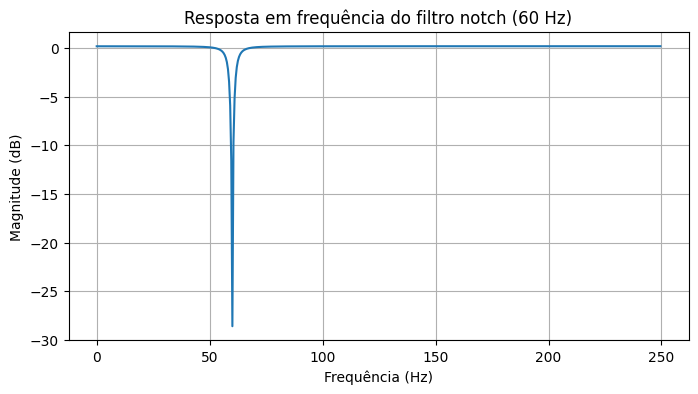

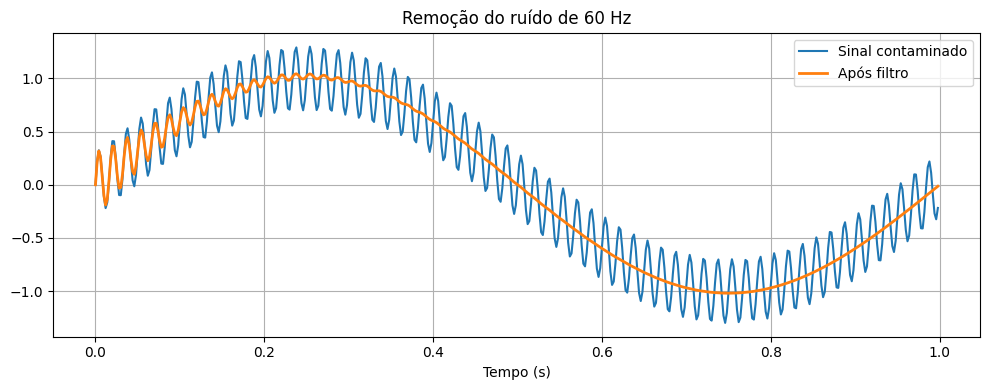

In [4]:
#Resposta da questão 1a

from scipy.signal import lfilter, freqz

fs = 500.0   
f0 = 60.0        
r = 0.98        


w0 = 2 * np.pi * f0 / fs   # frequência angular

b = [1, -2*np.cos(w0), 1]                 
a = [1, -2*r*np.cos(w0), r**2]           

print("Coeficientes do filtro:")
print(f"b = {b}")
print(f"a = {a}")

w, h = freqz(b, a, fs=fs)
plt.figure(figsize=(8,4))
plt.plot(w, 20*np.log10(abs(h)))
plt.title('Resposta em frequência do filtro notch (60 Hz)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.show()

t = np.arange(0, 1.0, 1/fs)

sinal_ecg = np.sin(2*np.pi*1*t)          
ruido_60hz = 0.3*np.sin(2*np.pi*60*t)
x = sinal_ecg + ruido_60hz               

# Aplicando o filtro
y = lfilter(b, a, x)

plt.figure(figsize=(10,4))
plt.plot(t, x, label='Sinal contaminado')
plt.plot(t, y, label='Após filtro', linewidth=2)
plt.title('Remoção do ruído de 60 Hz')
plt.xlabel('Tempo (s)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Questão 1b (0.5 pontos)

A partir do diagrama desenvolvido na questão anterior, escreva a função de transferência do filtro H(z) e a equação de diferenças do sistema que realiza o filtro. Você pode inserir sua resposta como uma imagem escaneada abaixo.


Função de Transferência
H(z) = (1 - 2cos(w0)z⁻¹ + z⁻²) / (1 - 2r·cos(w0)z⁻¹ + r²z⁻²)
→ H(z) = (1 - 1.457937z⁻¹ + z⁻²) / (1 - 1.428779z⁻¹ + 0.9604z⁻²)

=== Equação de diferenças ===
y[n] = b0·x[n] + b1·x[n−1] + b2·x[n−2] − a1·y[n−1] − a2·y[n−2]
→ y[n] = x[n] -1.457937x[n−1] + 1x[n−2] +1.428779y[n−1] -0.960400y[n−2]


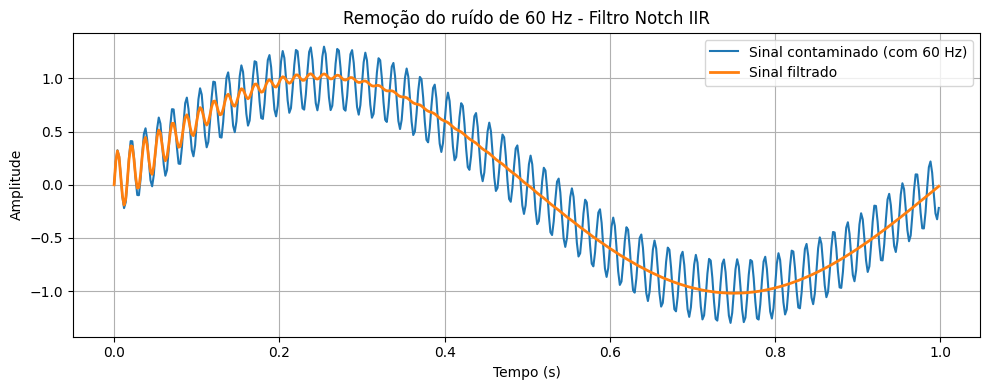

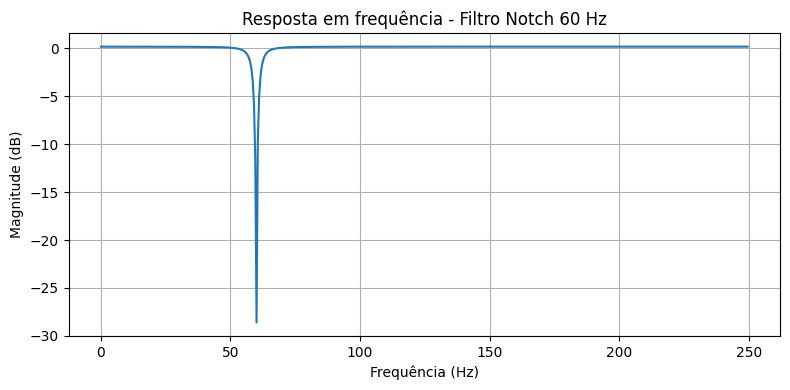

In [5]:
#Resposta da questão 1b
w0 = 2 * np.pi * f0 / fs   
b = [1, -2*np.cos(w0), 1]                 
a = [1, -2*r*np.cos(w0), r**2]            


print("\nFunção de Transferência")
print(f"H(z) = (1 - 2cos(w0)z⁻¹ + z⁻²) / (1 - 2r·cos(w0)z⁻¹ + r²z⁻²)")
print(f"→ H(z) = (1 - {2*np.cos(w0):.6f}z⁻¹ + z⁻²) / (1 - {2*r*np.cos(w0):.6f}z⁻¹ + {r**2:.4f}z⁻²)")

print("\n=== Equação de diferenças ===")
print("y[n] = b0·x[n] + b1·x[n−1] + b2·x[n−2] − a1·y[n−1] − a2·y[n−2]")
print(f"→ y[n] = x[n] {b[1]:+.6f}x[n−1] + {b[2]}x[n−2] { -a[1]:+.6f}y[n−1] { -a[2]:+.6f}y[n−2]")

t = np.arange(0, 1.0, 1/fs)


sinal_puro = np.sin(2*np.pi*1*t)             
ruido_60 = 0.3*np.sin(2*np.pi*60*t)          
x = sinal_puro + ruido_60                   


y = lfilter(b, a, x)

plt.figure(figsize=(10, 4))
plt.plot(t, x, label='Sinal contaminado (com 60 Hz)')
plt.plot(t, y, label='Sinal filtrado', linewidth=2)
plt.title('Remoção do ruído de 60 Hz - Filtro Notch IIR')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


w, h = freqz(b, a, fs=fs)
plt.figure(figsize=(8, 4))
plt.plot(w, 20*np.log10(abs(h)))
plt.title('Resposta em frequência - Filtro Notch 60 Hz')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Questão 1c (1  ponto)

Plote a **resposta em frequência** do filtro projetado (magnitude e fase). 

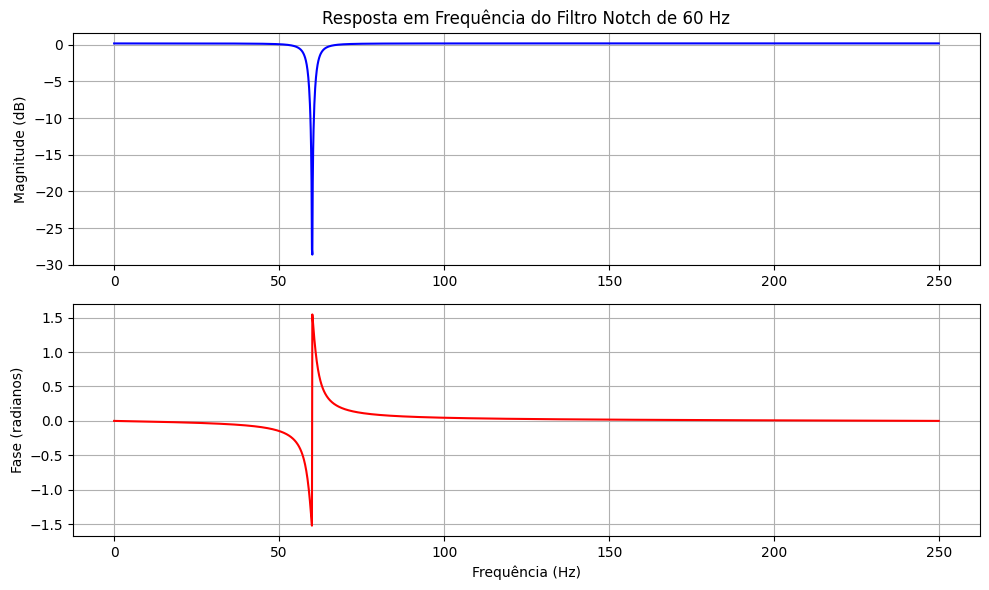

In [7]:

from scipy import signal
omega0 = 2 * np.pi * f0 / fs
b = [1, -2 * np.cos(omega0), 1]              
a = [1, -2 * r * np.cos(omega0), r**2]       

w, h = signal.freqz(b, a, worN=2048, fs=fs)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.title('Resposta em Frequência do Filtro Notch de 60 Hz')
plt.ylabel('Magnitude (dB)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(w, np.angle(h), 'r')
plt.ylabel('Fase (radianos)')
plt.xlabel('Frequência (Hz)')
plt.grid(True)

plt.tight_layout()
plt.show()

## Questão 1d (0.5  pontos)

Carregue o sinal de ECG "noisy_ecg_data.mat" e aplique o filtro projetado neste sinal. Plote o sinal antes da filtragem (x[n]) e o sinal após a filtragem (y[n]).

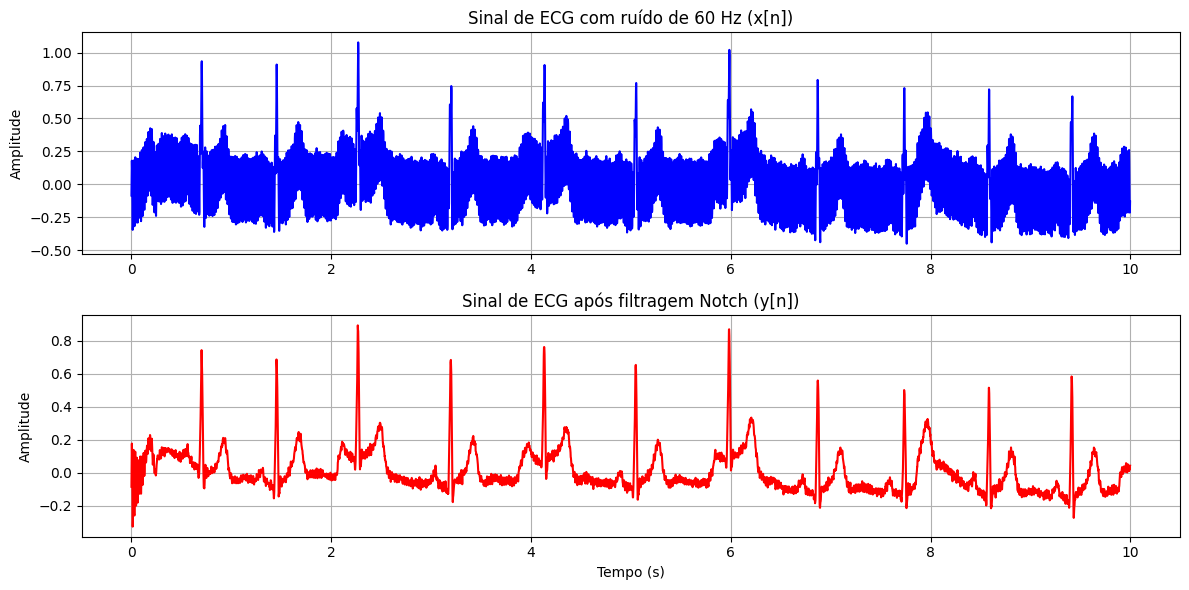

In [8]:
#Resposta da questão 1d

sinal = sp.io.loadmat('noisy_ecg_data.mat')['noisy_ecg'].ravel()
sinal_filtrado = signal.lfilter(b, a, sinal)

t = np.arange(len(sinal)) / fs

plt.figure(figsize=(12, 6))


plt.subplot(2, 1, 1)
plt.plot(t, sinal, 'b')
plt.title('Sinal de ECG com ruído de 60 Hz (x[n])')
plt.ylabel('Amplitude')
plt.grid(True)


plt.subplot(2, 1, 2)
plt.plot(t, sinal_filtrado, 'r')
plt.title('Sinal de ECG após filtragem Notch (y[n])')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


# Questão 2

Ainda no sistema de aquisição de dados de eletrocardiograma, mais tarde foi verificado que, mesmo depois de resolvido o problema da interferência da rede elétrica (i.e., o sinal não tem um ruído específico em 60Hz), o sinal adquirido tinha bastante ruído de alta frequência (acima de 35Hz). O objetivo desta questão é projetar um filtro digital para atenuar as frequências acima de 35Hz. A frequêencia de amostragem do sistema é:

$$ f_a = 500~Hz $$

Siga as questões abaixo.

## Questão 2a (0.5  pontos)

Projete o filtro em questão utilizando a colocação de pólos e zeros no plano z. Desenhe o diagrama de pólos e zeros do filtro projetado, indicando quais pólos e zeros foram indicados e o porquê destes pólos/zeros terem sido escolhidos. Você pode inserir o seu projeto como uma imagem escaneada abaixo.

Projeto do filtro passa-baixas (Butterworth)
fs = 500.0 Hz, fc = 35.0 Hz, ordem = 4

Zeros (z):
  -1.0
  -1.0
  -1.0
  -1.0

Polos (p):
  (0.7780522459714531+0.33825409659477523j)
  (0.6493808890370768+0.11693866254337679j)
  (0.6493808890370768-0.11693866254337679j)
  (0.7780522459714531-0.33825409659477523j)

Ganho (k): 0.00139747535936

Coeficientes do numerador (b):
[0.001397475359 0.005589901437 0.008384852156 0.005589901437
 0.001397475359]

Coeficientes do denominador (a):
[ 1.             -2.854866270017  3.176160357993 -1.612305730017
  0.313371247791]

Forma de H(z):
H(z) = (b0 + b1 z^{-1} + b2 z^{-2} + ... + bN z^{-N})
       (a0 + a1 z^{-1} + a2 z^{-2} + ... + aM z^{-M})

Coeficientes numéricos (prontos para implementação):
  b[0] = 1.397475359358163e-03
  b[1] = 5.589901437432654e-03
  b[2] = 8.384852156148981e-03
  b[3] = 5.589901437432654e-03
  b[4] = 1.397475359358163e-03
  a[0] = 1.000000000000000e+00
  a[1] = -2.854866270017060e+00
  a[2] = 3.176160357993334e+00
  a[3

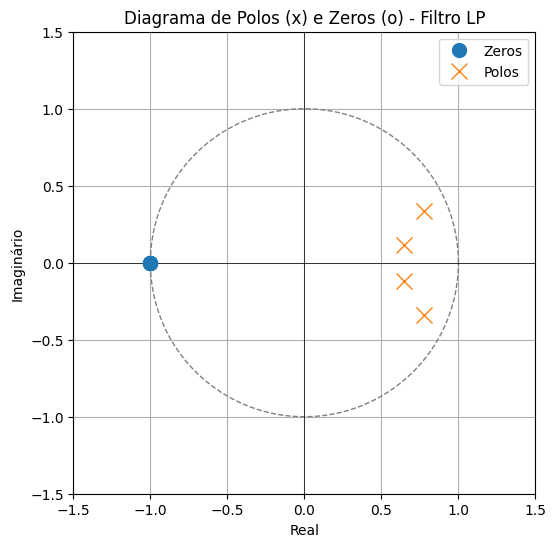

In [ ]:
#Resposta da questão 2a
fc = 35.0              
order = 4              


wn = fc / (fs/2.0) 

z, p, k = signal.butter(order, wn, btype='low', output='zpk', analog=False)

b, a = signal.zpk2tf(z, p, k)


np.set_printoptions(precision=12, suppress=True)
print("Projeto do filtro passa-baixas (Butterworth)")
print(f"fs = {fs} Hz, fc = {fc} Hz, ordem = {order}")
print("\nZeros (z):")
for zi in z:
    print(f"  {zi}")
print("\nPolos (p):")
for pi in p:
    print(f"  {pi}")
print(f"\nGanho (k): {k:.12g}")

print("\nCoeficientes do numerador (b):")
print(b)
print("\nCoeficientes do denominador (a):")
print(a)

print("\nForma de H(z):")
print("H(z) = (b0 + b1 z^{-1} + b2 z^{-2} + ... + bN z^{-N})")
print("       (a0 + a1 z^{-1} + a2 z^{-2} + ... + aM z^{-M})")
print("\nCoeficientes numéricos (prontos para implementação):")
for i, bi in enumerate(b):
    print(f"  b[{i}] = {bi:.15e}")
for i, ai in enumerate(a):
    print(f"  a[{i}] = {ai:.15e}")


if abs(a[0] - 1.0) > 1e-12:
    b = b / a[0]
    a = a / a[0]
    print("\nAviso: a[0] != 1. Coeficientes normalizados dividindo por a[0].")

print("\nEquação de diferenças (forma prática, a[0]==1):")

terms_x = " + ".join([f"{b[i]:+.12e} x[n-{i}]" if i>0 else f"{b[i]:+.12e} x[n]" for i in range(len(b))])
terms_y = " ".join([f"{-a[i]:+.12e} y[n-{i}]" for i in range(1, len(a))])
print(f"y[n] = {terms_x} {terms_y}")




plot_pz(z, p)

## Questão 2b (0.5 pontos)

A partir do diagrama desenvolvido na questão anterior, escreva a função de transferência do filtro H(z) e a equação de diferenças do sistema que realiza o filtro. Você pode inserir sua resposta como uma imagem escaneada abaixo.

In [ ]:
#Resposta da questão 2b
import textwrap
wn = fc / (fs/2.0)
z, p, k = signal.butter(order, wn, btype='low', output='zpk', analog=False)
b, a = signal.zpk2tf(z, p, k)

#  a[0] == 1
if abs(a[0] - 1.0) > 1e-12:
    b = b / a[0]
    a = a / a[0]




num_str = poly_to_zinv_str(b)
den_str = poly_to_zinv_str(a)
Hz_str = f"H(z) = ( {num_str} ) / ( {den_str} )"


b_terms = []
for i, coef in enumerate(b):
    if i == 0:
        b_terms.append(f"({coef:.15e})*x[n]")
    else:
        b_terms.append(f"({coef:.15e})*x[n-{i}]")
a_terms = []
for i in range(1, len(a)):
    a_terms.append(f"({-a[i]:.15e})*y[n-{i}]") 

diff_eq = "y[n] = " + " + ".join(b_terms)
if a_terms:
    diff_eq += " + " + " + ".join(a_terms)


print("\n=== Função de Transferência H(z) ===\n")
print(Hz_str)

print("\n=== Zeros (z) ===")
for zi in z:
    print(f"  {zi}")

print("\nPolos (p)")
for pi in p:
    print(f"  {pi}")

print(f"\nGanho (k)\n  {k:.15e}")

print("\nCoeficientes normalizados (a[0] == 1)\n")
for i, coef in enumerate(b):
    print(f"b[{i}] = {coef:.15e}")
for i, coef in enumerate(a):
    print(f"a[{i}] = {coef:.15e}")

print("\nEquação de diferenças (implementação direta\n")
print(diff_eq)

print("\nH(z) (forma numérica legível)\n")
print(textwrap.dedent(f"""
H(z) = ( {b[0]:.15e} + {b[1]:.15e} z^(-1) + {b[2]:.15e} z^(-2) + {b[3]:.15e} z^(-3) + {b[4]:.15e} z^(-4) )
       / ( {a[0]:.15e} + {a[1]:.15e} z^(-1) + {a[2]:.15e} z^(-2) + {a[3]:.15e} z^(-3) + {a[4]:.15e} z^(-4) )
"""))


=== Função de Transferência H(z) ===

H(z) = ( 1.397475359358163e-03 + 5.589901437432654e-03 z^(-1) + 8.384852156148981e-03 z^(-2) + 5.589901437432654e-03 z^(-3) + 1.397475359358163e-03 z^(-4) ) / ( 1.000000000000000e+00 + -2.854866270017060e+00 z^(-1) + 3.176160357993334e+00 z^(-2) + -1.612305730017377e+00 z^(-3) + 3.133712477908330e-01 z^(-4) )

=== Zeros (z) ===
  -1.0
  -1.0
  -1.0
  -1.0

Polos (p)
  (0.7780522459714531+0.33825409659477523j)
  (0.6493808890370768+0.11693866254337679j)
  (0.6493808890370768-0.11693866254337679j)
  (0.7780522459714531-0.33825409659477523j)

Ganho (k)
  1.397475359358163e-03

Coeficientes normalizados (a[0] == 1)

b[0] = 1.397475359358163e-03
b[1] = 5.589901437432654e-03
b[2] = 8.384852156148981e-03
b[3] = 5.589901437432654e-03
b[4] = 1.397475359358163e-03
a[0] = 1.000000000000000e+00
a[1] = -2.854866270017060e+00
a[2] = 3.176160357993334e+00
a[3] = -1.612305730017377e+00
a[4] = 3.133712477908330e-01

Equação de diferenças (implementação direta

y[n

## Questão 2c (1  ponto)

Plote a **resposta em frequência** do filtro projetado (magnitude e fase). 

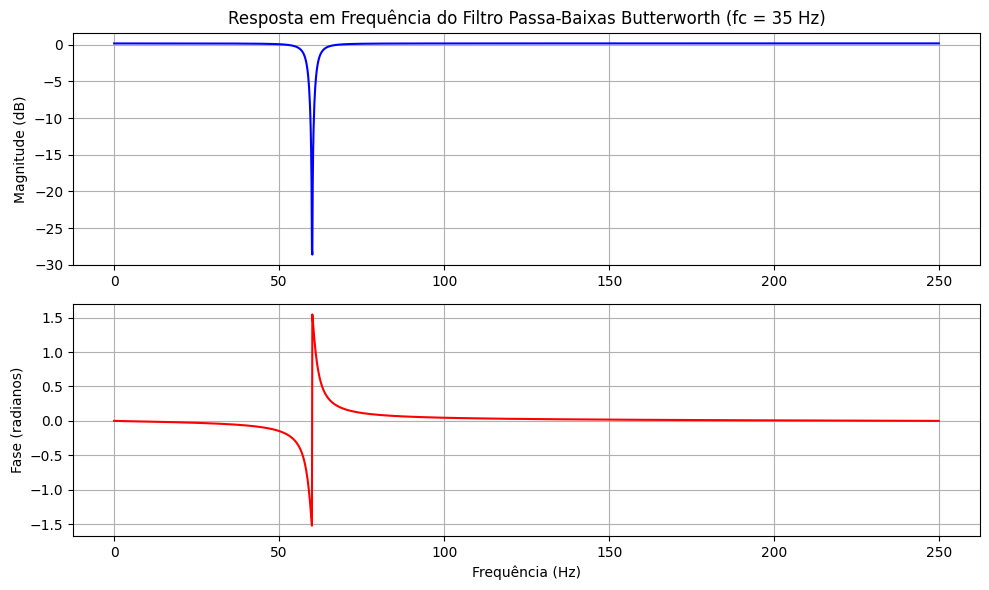

In [ ]:
#Resposta da questão 2c
plt.figure(figsize=(10, 6))


plt.subplot(2, 1, 1)
plt.plot(w, 20 * np.log10(np.abs(h)), 'b')
plt.title('Resposta em Frequência do Filtro Passa-Baixas Butterworth (fc = 35 Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(w, np.unwrap(np.angle(h)), 'r')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Fase (radianos)')
plt.grid(True)

plt.tight_layout()
plt.show()


## Questão 2d (0.5  pontos)

Carregue o sinal de ECG "noisy_ecg_data_2.mat" e aplique o filtro projetado neste sinal. Plote o sinal antes da filtragem (x[n]) e o sinal após a filtragem (y[n]).

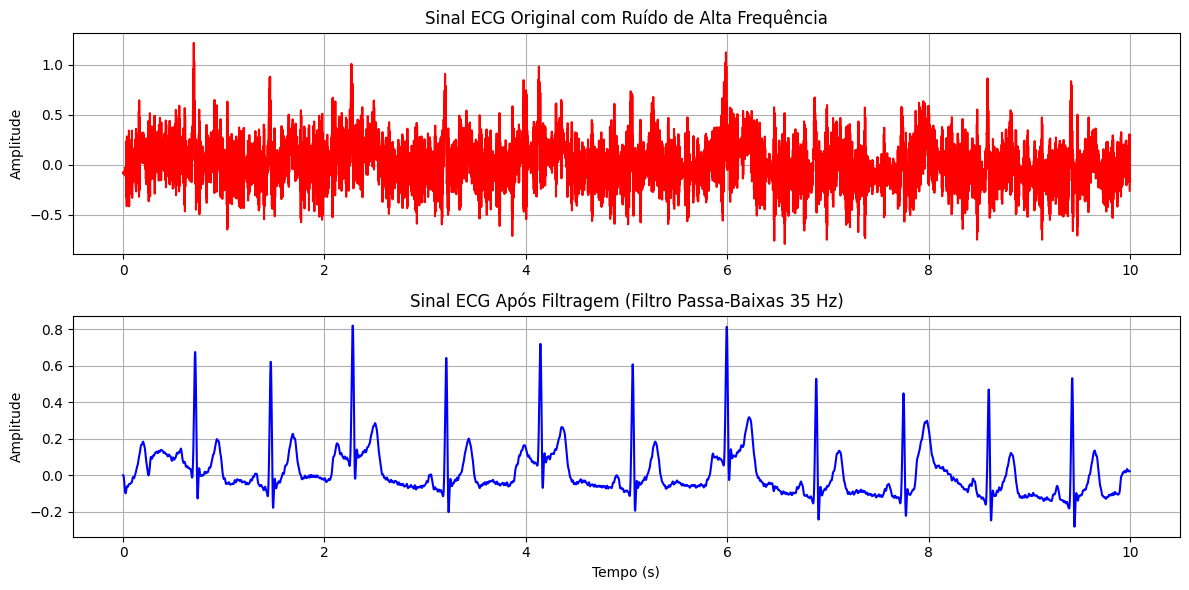

In [14]:
#Resposta da questão 2d

sinal = sp.io.loadmat('noisy_ecg_data_2.mat')['noisy_ecg2'].ravel()
wn = fc / (fs / 2.0)  
z, p, k = signal.butter(order, wn, btype='low', output='zpk', analog=False)
b, a = signal.zpk2tf(z, p, k)

# a[0] == 1
if abs(a[0] - 1.0) > 1e-12:
    b = b / a[0]
    a = a / a[0]

sinal_filtrado = signal.lfilter(b, a, sinal)

tempo = np.arange(len(sinal)) / fs

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(tempo, sinal, color='red')
plt.title('Sinal ECG Original com Ruído de Alta Frequência')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(tempo, sinal_filtrado, color='blue')
plt.title('Sinal ECG Após Filtragem (Filtro Passa-Baixas 35 Hz)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

# Questão 3

Considere o filtro analógico:

$$ H_a \left(s\right) = \frac{\omega_c}{\omega_c + s}$$

E considere o valor:

$$\omega_c = 10^3 $$

## Questão 3a (1  ponto)

Projete uma aproximação digital para este filtro com critério de 10%. Indique a taxa de amostragem calculada para esta aproximação (T1) e compare a resposta em frequência do filtro projetado H1() com a resposta em frequência do filtro analógic Ha(). Plote as frequências até ao menos:

$$ \omega = 10^5 \pi $$

Frequência máxima de interesse (Hz): 50000.000 Hz
Adotando margem 20%, fs = 120000.000 Hz  ->  T1 = 8.333e-06 s


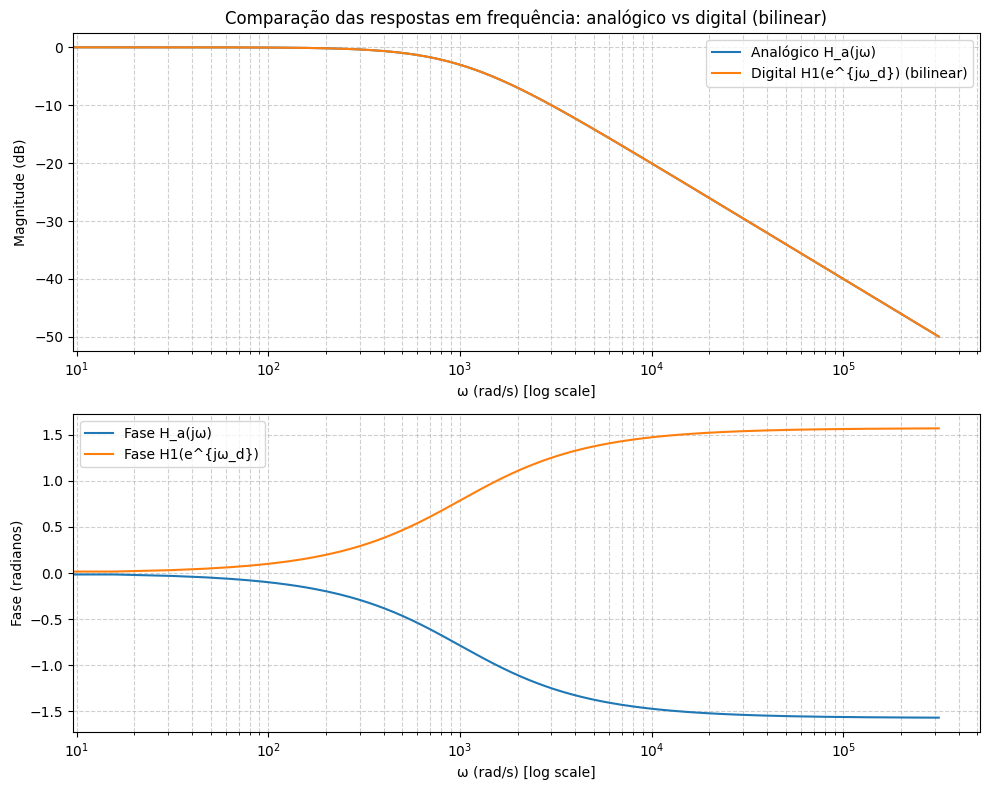

Erro relativo máximo (magnitude): 0.00 %
Erro relativo 95-percentil (magnitude): 0.00 %


In [15]:

wc = 1e3   

omega_max = 1e5 * np.pi
omega = np.linspace(0, omega_max, 20000)  


f_max = omega_max / (2*np.pi)

fs = 2.0 * f_max    
fs = fs * 1.2
T1 = 1.0 / fs

print(f"Frequência máxima de interesse (Hz): {f_max:.3f} Hz")
print(f"Adotando margem 20%, fs = {fs:.3f} Hz  ->  T1 = {T1:.3e} s")


b_a = [wc]        
a_a = [1.0, wc]    

b_z, a_z = signal.bilinear(b_a, a_a, fs=fs)


Ha = (wc) / (wc + 1j * omega)      

omega_d = 2.0 * np.arctan(omega * T1 / 2.0)   


z = np.exp(1j * omega_d)

Hz_num = np.polyval(b_z, z**-1)
Hz_den = np.polyval(a_z, z**-1)
H1 = Hz_num / Hz_den

plt.figure(figsize=(10,8))


plt.subplot(2,1,1)
plt.semilogx(omega, 20*np.log10(np.abs(Ha)+1e-20), label='Analógico H_a(jω)')
plt.semilogx(omega, 20*np.log10(np.abs(H1)+1e-20), label='Digital H1(e^{jω_d}) (bilinear)')
plt.xlabel('ω (rad/s) [log scale]')
plt.ylabel('Magnitude (dB)')
plt.title('Comparação das respostas em frequência: analógico vs digital (bilinear)')
plt.grid(which='both', linestyle='--', alpha=0.6)
plt.legend(loc='best')


plt.subplot(2,1,2)
plt.semilogx(omega, np.unwrap(np.angle(Ha)), label='Fase H_a(jω)')
plt.semilogx(omega, np.unwrap(np.angle(H1)), label='Fase H1(e^{jω_d})')
plt.xlabel('ω (rad/s) [log scale]')
plt.ylabel('Fase (radianos)')
plt.grid(which='both', linestyle='--', alpha=0.6)
plt.legend(loc='best')

plt.tight_layout()
plt.show()

mag_Ha = np.abs(Ha)
mag_H1 = np.abs(H1)

eps = 1e-12
rel_err = np.abs(mag_H1 - mag_Ha) / (mag_Ha + eps)

max_err = np.max(rel_err)
p95_err = np.percentile(rel_err, 95) 
print(f"Erro relativo máximo (magnitude): {max_err*100:.2f} %")
print(f"Erro relativo 95-percentil (magnitude): {p95_err*100:.2f} %")

## Questão 3b (1  ponto)

Projete uma aproximação digital para este filtro com critério de 1%. Indique a taxa de amostragem calculada para esta aproximação (T2) e compare a resposta em frequência do filtro projetado H2() com a resposta em frequência do filtro analógic Ha(). Plote as frequências até ao menos:

$$ \omega = 10^5 \pi $$

Encontrado fs que atende critério 1%: fs = 1.000000e+05 Hz
T2 = 1/fs = 1.000000e-05 s
Erro relativo máximo encontrado = 0.000000 %
Tempo de busca: 0.01 s


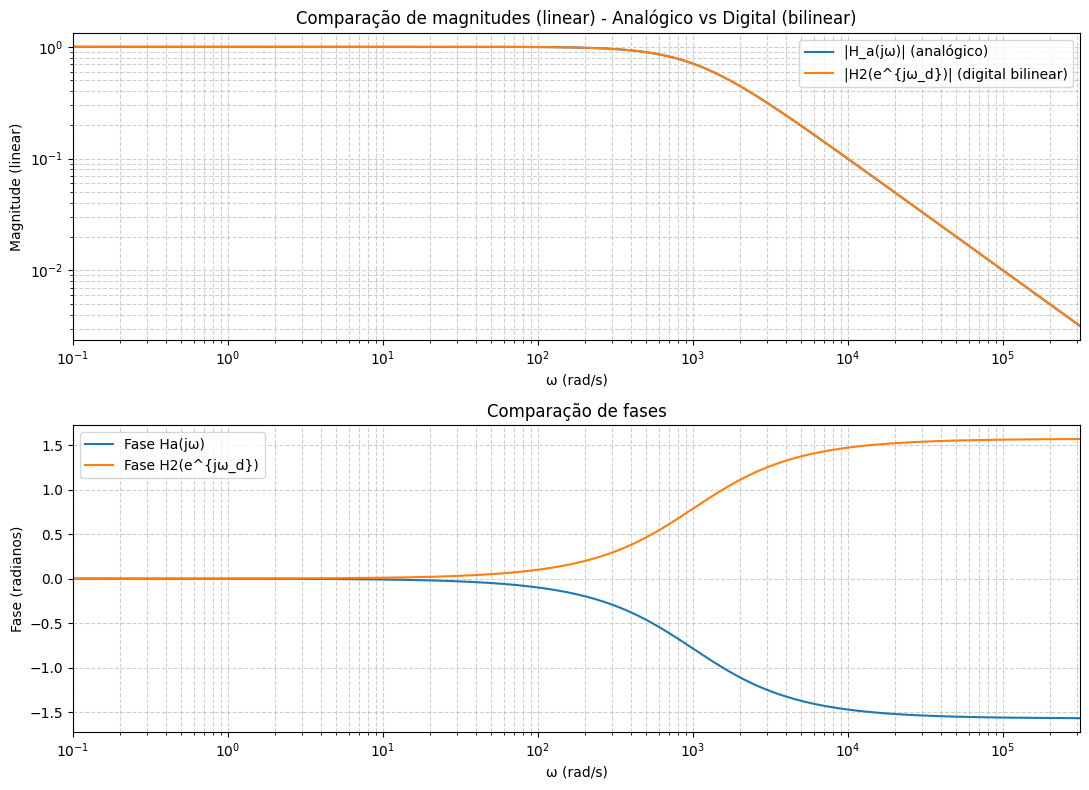

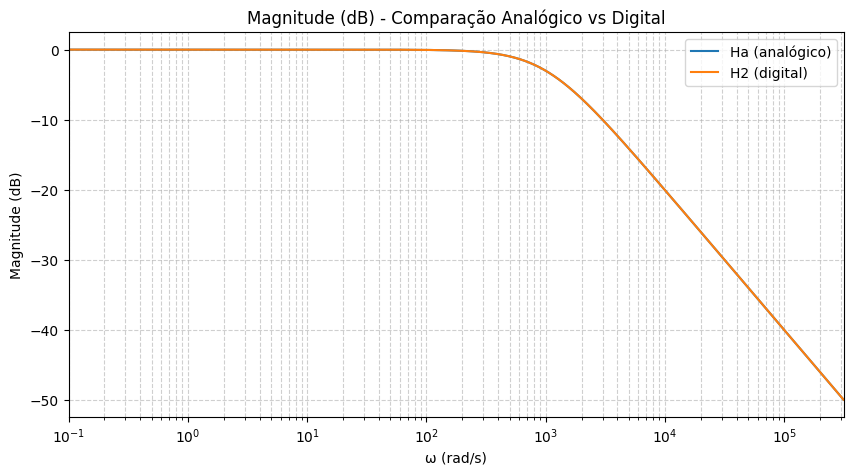


Coeficientes digitais obtidos via bilinear (b_z, a_z):
b_z = [4.975124378109454e-03 4.975124378109454e-03]
a_z = [1.000000000000000e+00 -9.900497512437811e-01]


In [ ]:
#Resposta da questão 3b
import time



Nw = 10000
omega = np.logspace(np.log10(1e-1), np.log10(omega_max), Nw)  


Ha = wc / (wc + 1j * omega)
mag_Ha = np.abs(Ha)







f_max_val = f_max
fs_min = 2.0 * f_max_val            
fs_upper_factor = 500.0             
found = False


n_candidates = 200
fs_candidates = np.logspace(np.log10(fs_min), np.log10(fs_min * fs_upper_factor), n_candidates)

start = time.time()
best_fs = None
best_result = None
best_rel_err = np.inf

for fs_try in fs_candidates:
    rel_err_max, H2_try, b_z_try, a_z_try = test_fs(fs_try)
    if rel_err_max < best_rel_err:
        best_rel_err = rel_err_max
        best_fs = fs_try
        best_result = (H2_try, b_z_try, a_z_try)
    if rel_err_max <= 0.01:
        found = True
        best_fs = fs_try
        best_rel_err = rel_err_max
        best_result = (H2_try, b_z_try, a_z_try)
        break

if not found:
    fs_min2 = fs_min * fs_upper_factor
    fs_max2 = fs_min2 * 2000.0
    fs_candidates2 = np.logspace(np.log10(fs_min2), np.log10(fs_max2), n_candidates)
    for fs_try in fs_candidates2:
        rel_err_max, H2_try, b_z_try, a_z_try = test_fs(fs_try)
        if rel_err_max < best_rel_err:
            best_rel_err = rel_err_max
            best_fs = fs_try
            best_result = (H2_try, b_z_try, a_z_try)
        if rel_err_max <= 0.01:
            found = True
            best_fs = fs_try
            best_rel_err = rel_err_max
            best_result = (H2_try, b_z_try, a_z_try)
            break

end = time.time()


print(f"Encontrado fs que atende critério 1%: fs = {best_fs:.6e} Hz")
print(f"T2 = 1/fs = {1.0/best_fs:.6e} s")
print(f"Erro relativo máximo encontrado = {best_rel_err*100:.6f} %")
print(f"Tempo de busca: {end - start:.2f} s")

H2_best, b_z_best, a_z_best = best_result
T2 = 1.0 / best_fs


omega_d_full = 2.0 * np.arctan(omega * T2 / 2.0)
z_full = np.exp(1j * omega_d_full)
Hz_num_full = np.polyval(b_z_best, z_full**-1)
Hz_den_full = np.polyval(a_z_best, z_full**-1)
H2_full = Hz_num_full / Hz_den_full
mag_H2_full = np.abs(H2_full)


plt.figure(figsize=(11, 8))

plt.subplot(2,1,1)
plt.loglog(omega, mag_Ha, label='|H_a(jω)| (analógico)')
plt.loglog(omega, mag_H2_full, label='|H2(e^{jω_d})| (digital bilinear)')
plt.xlim([omega[0], omega[-1]])
plt.xlabel('ω (rad/s)')
plt.ylabel('Magnitude (linear)')
plt.title('Comparação de magnitudes (linear) - Analógico vs Digital (bilinear)')
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()

plt.subplot(2,1,2)
plt.semilogx(omega, np.unwrap(np.angle(Ha)), label='Fase Ha(jω)')
plt.semilogx(omega, np.unwrap(np.angle(H2_full)), label='Fase H2(e^{jω_d})')
plt.xlim([omega[0], omega[-1]])
plt.xlabel('ω (rad/s)')
plt.ylabel('Fase (radianos)')
plt.title('Comparação de fases')
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()


plt.figure(figsize=(10,5))
plt.semilogx(omega, 20*np.log10(mag_Ha + 1e-20), label='Ha (analógico)')
plt.semilogx(omega, 20*np.log10(mag_H2_full + 1e-20), label='H2 (digital)')
plt.xlabel('ω (rad/s)')
plt.ylabel('Magnitude (dB)')
plt.title('Magnitude (dB) - Comparação Analógico vs Digital')
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()
plt.xlim([omega[0], omega[-1]])
plt.show()


print("\nCoeficientes digitais obtidos via bilinear (b_z, a_z):")
print("b_z =", np.array2string(b_z_best, formatter={'float_kind':lambda x: f"{x:.15e}"}))
print("a_z =", np.array2string(a_z_best, formatter={'float_kind':lambda x: f"{x:.15e}"}))

eps = 1e-15
rel_err_full = np.abs(mag_H2_full - mag_Ha) / (mag_Ha + eps)

## Questão 3c (1 ponto)

Calcule a resposta ao impulso ha(t) do filtro analógico Ha(s), bem como as respostas ao impulso h1[n] e h2[n] dos filtros projetados H1(z) e H2(z). **Plote** as respostas ao impulso na mesma escala.

[H1] fs1 = 1.200000e+05 Hz, T1 = 8.333333e-06 s


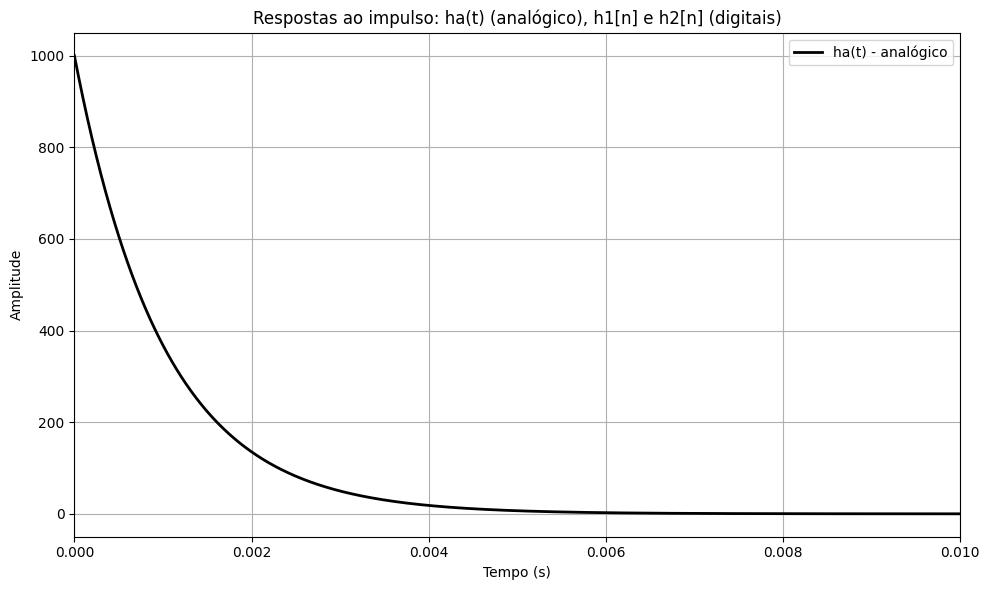

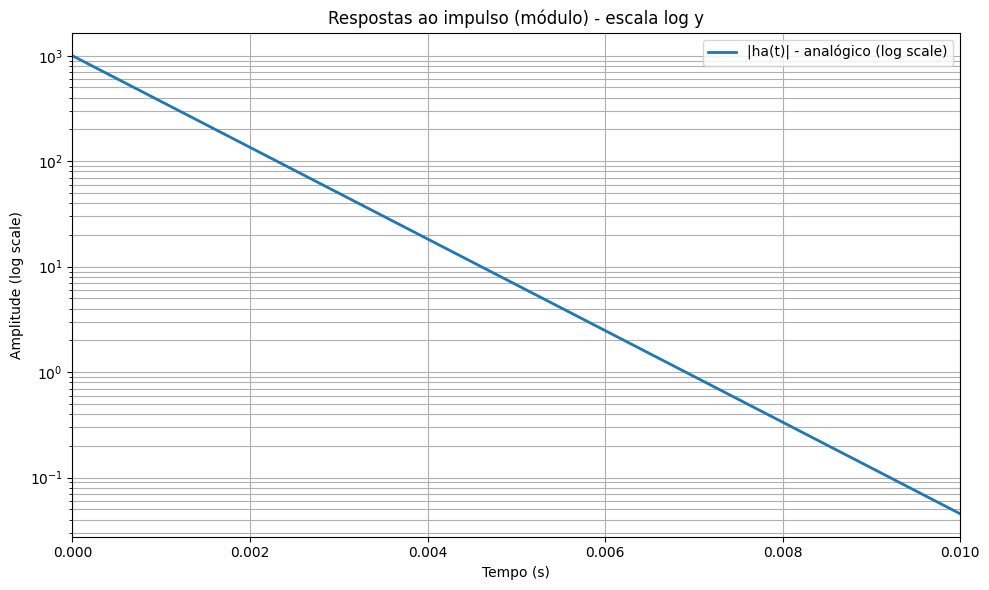


Coeficientes H1 (b1, a1):
b1_z = [4.149377593360995e-03 4.149377593360995e-03]
a1_z = [1.000000000000000e+00 -9.917012448132780e-01]

Coeficientes H2 (b2, a2):
b2_z = [4.975124378109454e-03 4.975124378109454e-03]
a2_z = [1.000000000000000e+00 -9.900497512437811e-01]

Tamanho h1: 1201 amostras, T1 = 8.333e-06 s
Primeiros 8 valores h1: [0.004149377593 0.008264320518 0.008195736945 0.008127722531
 0.008060272551 0.007993382323 0.007927047199 0.007861262575]

Tamanho h2: 1001 amostras, T2 = 1.000e-05 s
Primeiros 8 valores h2: [0.004975124378 0.009900745031 0.009802230155 0.009704695527
 0.009608131392 0.009512528095 0.009417876074 0.009324165864]


In [ ]:
#Resposta da questão 3c
fs1 = 1.2 * 2.0 * f_max
T1 = 1.0 / fs1

print(f"[H1] fs1 = {fs1:.6e} Hz, T1 = {T1:.6e} s")


b_a = [wc]
a_a = [1.0, wc]
b1_z, a1_z = signal.bilinear(b_a, a_a, fs=fs1)


Nw = 5000
omega = np.logspace(np.log10(1e-1), np.log10(omega_max), Nw)
Ha = wc / (wc + 1j * omega)
mag_Ha = np.abs(Ha)
eps = 1e-15



fs_min = 2.0 * f_max
factor_initial = 500.0
found = False
best_fs = None
best_err = np.inf
best_bz = None
best_az = None


candidates = np.logspace(np.log10(fs_min), np.log10(fs_min * factor_initial), 200)
start_search = time.time()
for fs_try in candidates:
    rel_err_max, b_z_try, a_z_try = rel_err_for_fs(fs_try)
    if rel_err_max < best_err:
        best_err = rel_err_max
        best_fs = fs_try
        best_bz = b_z_try
        best_az = a_z_try
    if rel_err_max <= 0.01:
        found = True
        best_fs = fs_try
        best_err = rel_err_max
        best_bz = b_z_try
        best_az = a_z_try
        break


if not found:
    candidates2 = np.logspace(np.log10(fs_min * factor_initial), np.log10(fs_min * factor_initial * 2000.0), 200)
    for fs_try in candidates2:
        rel_err_max, b_z_try, a_z_try = rel_err_for_fs(fs_try)
        if rel_err_max < best_err:
            best_err = rel_err_max
            best_fs = fs_try
            best_bz = b_z_try
            best_az = a_z_try
        if rel_err_max <= 0.01:
            found = True
            best_fs = fs_try
            best_err = rel_err_max
            best_bz = b_z_try
            best_az = a_z_try
            break
end_search = time.time()


fs2 = best_fs
T2 = 1.0 / fs2
b2_z = best_bz
a2_z = best_az


Tmax = 0.01  

t_cont = np.linspace(0, Tmax, 1000)
ha_t = wc * np.exp(-wc * t_cont)


N1 = int(np.ceil(Tmax / T1)) + 1
delta1 = np.zeros(N1)
delta1[0] = 1.0
h1_n = signal.lfilter(b1_z, a1_z, delta1)
t1 = np.arange(N1) * T1

N2 = int(np.ceil(Tmax / T2)) + 1
delta2 = np.zeros(N2)
delta2[0] = 1.0
h2_n = signal.lfilter(b2_z, a2_z, delta2)
t2 = np.arange(N2) * T2

plt.figure(figsize=(10,6))


plt.plot(t_cont, ha_t, label='ha(t) - analógico', linewidth=2, color='black')


plt.xlim(0, Tmax)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Respostas ao impulso: ha(t) (analógico), h1[n] e h2[n] (digitais)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
plt.semilogy(t_cont, np.abs(ha_t), linewidth=2, label='|ha(t)| - analógico (log scale)')
plt.xlim(0, Tmax)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude (log scale)')
plt.title('Respostas ao impulso (módulo) - escala log y')
plt.legend()
plt.grid(True, which='both')
plt.tight_layout()
plt.show()

print("\nCoeficientes H1 (b1, a1):")
print("b1_z =", np.array2string(b1_z, formatter={'float_kind':lambda x: f"{x:.15e}"}))
print("a1_z =", np.array2string(a1_z, formatter={'float_kind':lambda x: f"{x:.15e}"}))

print("\nCoeficientes H2 (b2, a2):")
print("b2_z =", np.array2string(b2_z, formatter={'float_kind':lambda x: f"{x:.15e}"}))
print("a2_z =", np.array2string(a2_z, formatter={'float_kind':lambda x: f"{x:.15e}"}))

print(f"\nTamanho h1: {len(h1_n)} amostras, T1 = {T1:.3e} s")
print(f"Primeiros 8 valores h1: {h1_n[:8]}")
print(f"\nTamanho h2: {len(h2_n)} amostras, T2 = {T2:.3e} s")
print(f"Primeiros 8 valores h2: {h2_n[:8]}")

## Questão 3d (2 pontos)

Considere o sinal:
$$ x\left(t\right) = e^{- \lambda t} u\left(t\right)$$

com

$$\lambda = 500 $$

Calcule a resposta teórica do filtro analógico, y(t), bem como a resposta do filtro digital H1(z) ao sinal amostrado com taxa T1 (x1[n]) e a resposta do filtro digital H2(z) ao sinal amostrado com taxa T2 (x2[n]). **Plote**, na mesma escala, o sinal y(t) e as aproximações y1[n] e y2[n]. 

fs1 = 1.200000e+05 Hz, T1 = 8.333333e-06 s


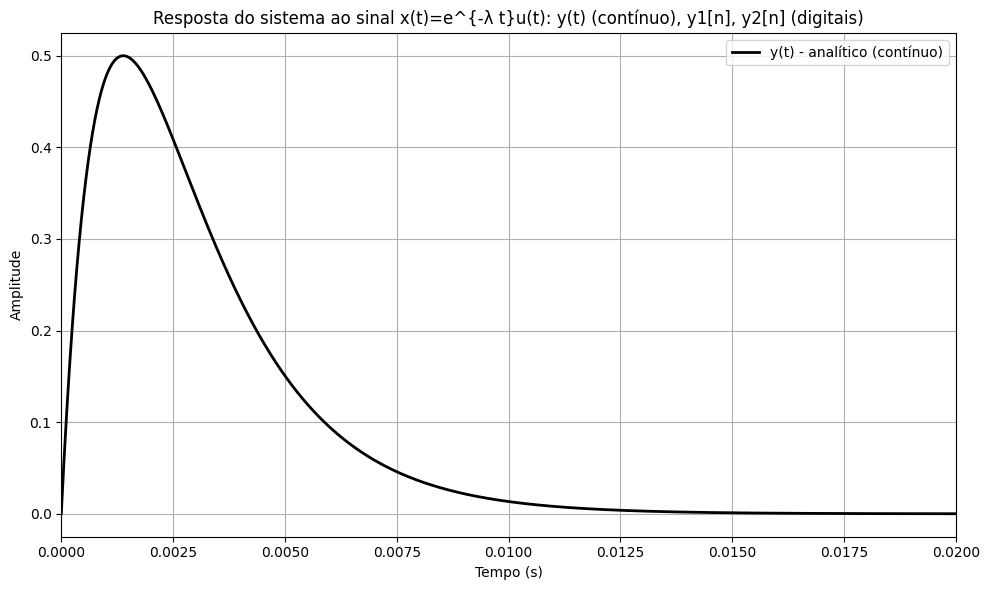

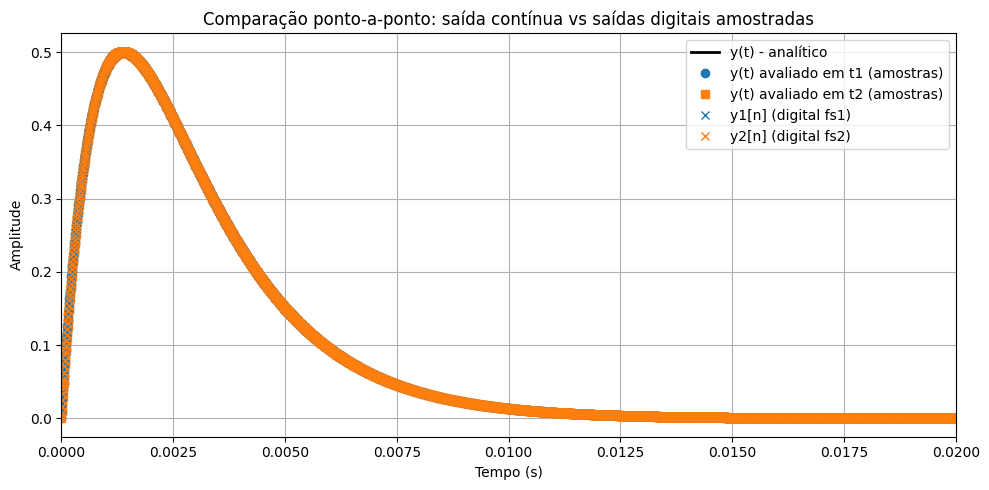


Informações numéricas:
fs1 = 1.200000e+05 Hz, T1 = 8.333333e-06 s
fs2 = 1.000000e+05 Hz, T2 = 1.000000e-05 s
Erro relativo máximo (critério usado para selecionar fs2): 0.000000 %

Primeiros 8 valores y1: [0.004149377593 0.012396445007 0.020540637557 0.028582952154
 0.036524376843 0.044365890874 0.052108464781 0.059753060456]
Primeiros 8 valores y2: [0.004975124378 0.014851055873 0.024579216078 0.034161322253
 0.043599073339 0.052894150149 0.062048215548 0.071062914646]


In [ ]:
#Resposta da questão 3d
lam = 500.0         

fs1 = 1.2 * 2.0 * f_max    
T1 = 1.0 / fs1
print(f"fs1 = {fs1:.6e} Hz, T1 = {T1:.6e} s")


b_a = [wc]
a_a = [1.0, wc]

b1_z, a1_z = signal.bilinear(b_a, a_a, fs=fs1)

Nw = 5000
omega = np.logspace(np.log10(1e-1), np.log10(omega_max), Nw)
Ha = wc / (wc + 1j * omega)
mag_Ha = np.abs(Ha)
eps = 1e-15



fs_min = 2.0 * f_max
factor = 500.0
found = False
best_fs = None
best_err = np.inf
best_bz = None
best_az = None

candidates = np.logspace(np.log10(fs_min), np.log10(fs_min * factor), 200)
start = time.time()
for fs_try in candidates:
    rel_err_max, b_z_try, a_z_try = max_rel_err_for_fs(fs_try)
    if rel_err_max < best_err:
        best_err = rel_err_max
        best_fs = fs_try
        best_bz = b_z_try
        best_az = a_z_try
    if rel_err_max <= 0.01:
        found = True
        best_fs = fs_try
        best_err = rel_err_max
        best_bz = b_z_try
        best_az = a_z_try
        break

if (not found):

    candidates2 = np.logspace(np.log10(fs_min*factor), np.log10(fs_min*factor*2000.0), 400)
    for fs_try in candidates2:
        rel_err_max, b_z_try, a_z_try = max_rel_err_for_fs(fs_try)
        if rel_err_max < best_err:
            best_err = rel_err_max
            best_fs = fs_try
            best_bz = b_z_try
            best_az = a_z_try
        if rel_err_max <= 0.01:
            found = True
            best_fs = fs_try
            best_err = rel_err_max
            best_bz = b_z_try
            best_az = a_z_try
            break

end = time.time()

fs2 = best_fs
T2 = 1.0 / fs2
b2_z = best_bz
a2_z = best_az

A = wc / (lam - wc)

tau = 1.0 / lam                 
Tmax = 0.02                    
t_cont = np.linspace(0, Tmax, 2000)
x_t = np.exp(-lam * t_cont)
y_t = A * (np.exp(-wc * t_cont) - np.exp(-lam * t_cont))


# x1[n]
n1 = np.arange(0, int(np.ceil(Tmax / T1)) + 1)
t1 = n1 * T1
x1 = np.exp(-lam * t1)
y1 = signal.lfilter(b1_z, a1_z, x1)

# x2[n]
n2 = np.arange(0, int(np.ceil(Tmax / T2)) + 1)
t2 = n2 * T2
x2 = np.exp(-lam * t2)
y2 = signal.lfilter(b2_z, a2_z, x2)

plt.figure(figsize=(10,6))
plt.plot(t_cont, y_t, label='y(t) - analítico (contínuo)', linewidth=2, color='k')

plt.xlim(0, Tmax)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Resposta do sistema ao sinal x(t)=e^{-λ t}u(t): y(t) (contínuo), y1[n], y2[n] (digitais)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10,5))
plt.plot(t_cont, y_t, label='y(t) - analítico', linewidth=2, color='k')
plt.plot(t1, y_t[np.searchsorted(t_cont, t1)], 'C0o', label='y(t) avaliado em t1 (amostras)')
plt.plot(t2, y_t[np.searchsorted(t_cont, t2)], 'C1s', label='y(t) avaliado em t2 (amostras)')
plt.plot(t1, y1, 'C0x', label='y1[n] (digital fs1)')
plt.plot(t2, y2, 'C1x', label='y2[n] (digital fs2)')
plt.xlim(0, Tmax)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Comparação ponto-a-ponto: saída contínua vs saídas digitais amostradas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


print("\nInformações numéricas:")
print(f"fs1 = {fs1:.6e} Hz, T1 = {T1:.6e} s")
print(f"fs2 = {fs2:.6e} Hz, T2 = {T2:.6e} s")
print(f"Erro relativo máximo (critério usado para selecionar fs2): {best_err*100:.6f} %")

print("\nPrimeiros 8 valores y1:", y1[:8])
print("Primeiros 8 valores y2:", y2[:8])